In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df = pd.read_csv('archive/predictive_maintenance.csv')

In [38]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


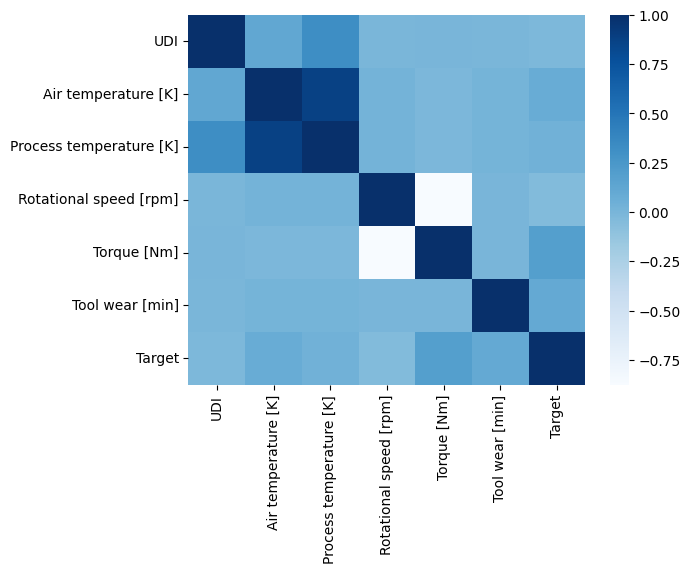

In [40]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Display the heatmap of correlations
sns.heatmap(numeric_data.corr(), cmap="Blues")
plt.show()

In [41]:
null_values = df.isnull().sum()

In [42]:
null_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [43]:
for column in df.columns:
    unique_values_count = df[column].nunique()
    print("Number of unique values in column '{}': {}".format(column, unique_values_count))

Number of unique values in column 'UDI': 10000
Number of unique values in column 'Product ID': 10000
Number of unique values in column 'Type': 3
Number of unique values in column 'Air temperature [K]': 93
Number of unique values in column 'Process temperature [K]': 82
Number of unique values in column 'Rotational speed [rpm]': 941
Number of unique values in column 'Torque [Nm]': 577
Number of unique values in column 'Tool wear [min]': 246
Number of unique values in column 'Target': 2
Number of unique values in column 'Failure Type': 6


In [44]:
failure_type_counts = df['Failure Type'].value_counts()

print("Unique failure types and their counts:")
print(failure_type_counts)

Unique failure types and their counts:
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


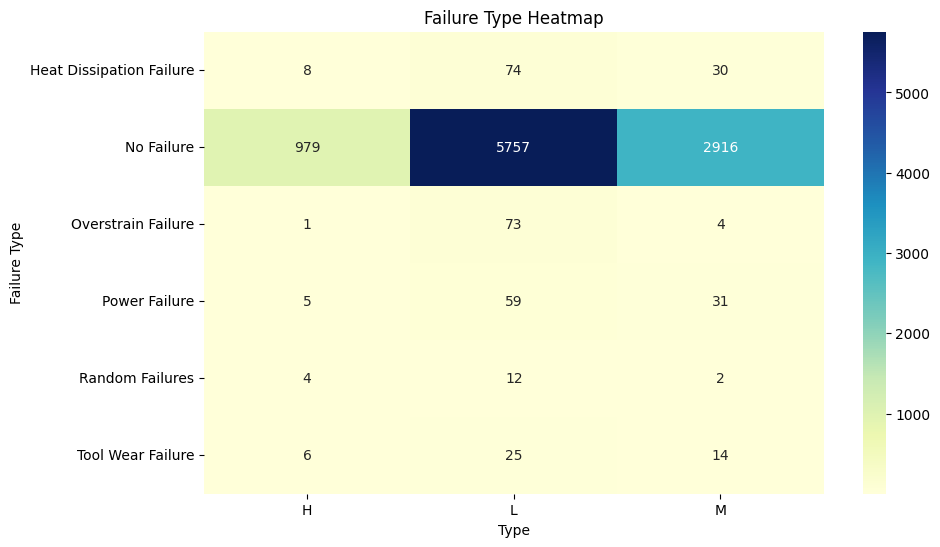

In [45]:
pivot_table = df.pivot_table(index='Failure Type', columns='Type', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Failure Type Heatmap')
plt.xlabel('Type')
plt.ylabel('Failure Type')
plt.show()

In [46]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [47]:

columns_to_drop = ['UDI','Product ID','Target']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [48]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


<Axes: xlabel='Failure Type', ylabel='count'>

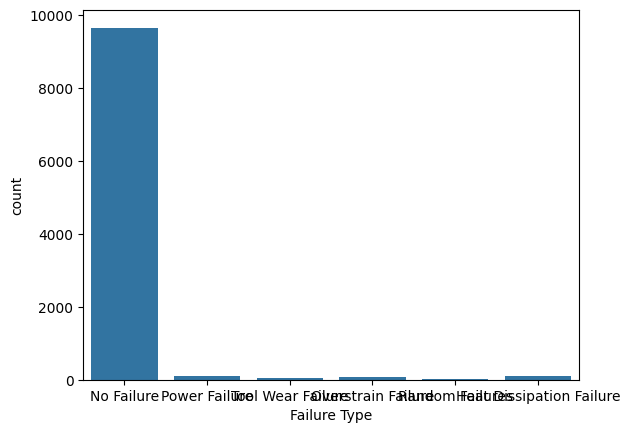

In [49]:
sns.countplot(x='Failure Type',data= df)

In [50]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [51]:
Type_binary = pd.get_dummies(df['Type']).astype("int")

In [52]:
df= pd.concat([df,Type_binary],axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
 7   H                        10000 non-null  int32  
 8   L                        10000 non-null  int32  
 9   M                        10000 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(2)
memory usage: 664.2+ KB


In [54]:
df=df.drop(columns=['Type'])

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Create a dictionary to map categories to numerical values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the category mapping
print(category_mapping)

{'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


In [56]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,H,L,M
0,298.1,308.6,1551,42.8,0,1,0,0,1
1,298.2,308.7,1408,46.3,3,1,0,1,0
2,298.1,308.5,1498,49.4,5,1,0,1,0
3,298.2,308.6,1433,39.5,7,1,0,1,0
4,298.2,308.7,1408,40.0,9,1,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,1,0,0,1
9996,298.9,308.4,1632,31.8,17,1,1,0,0
9997,299.0,308.6,1645,33.4,22,1,0,0,1
9998,299.0,308.7,1408,48.5,25,1,1,0,0


In [57]:
from sklearn.model_selection import train_test_split


X = df.drop('Failure Type', axis=1)
y = df['Failure Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [58]:
X_test.sample(20)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
1947,298.2,308.1,1462,49.9,69,0,1,0
43,298.8,309.2,1372,48.5,120,1,0,0
9925,298.5,308.7,1367,47.3,47,0,0,1
1063,296.8,307.8,1664,32.8,142,0,0,1
6900,301.0,311.7,1670,31.3,150,0,1,0
6289,301.0,310.5,1248,61.4,77,0,1,0
2939,300.9,309.7,1431,41.4,199,0,1,0
6672,301.6,310.7,1424,50.5,214,0,1,0
6039,300.6,310.9,1433,42.6,101,0,1,0
6583,301.5,310.5,1503,38.2,200,0,0,1


In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 651 to 235
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      7500 non-null   float64
 1   Process temperature [K]  7500 non-null   float64
 2   Rotational speed [rpm]   7500 non-null   int64  
 3   Torque [Nm]              7500 non-null   float64
 4   Tool wear [min]          7500 non-null   int64  
 5   H                        7500 non-null   int32  
 6   L                        7500 non-null   int32  
 7   M                        7500 non-null   int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 439.5 KB


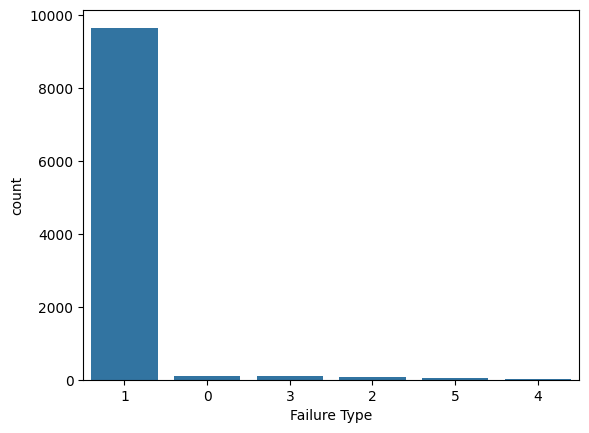

In [60]:
sns.countplot(x='Failure Type', data=df, order=y_train.value_counts().index)
plt.show()

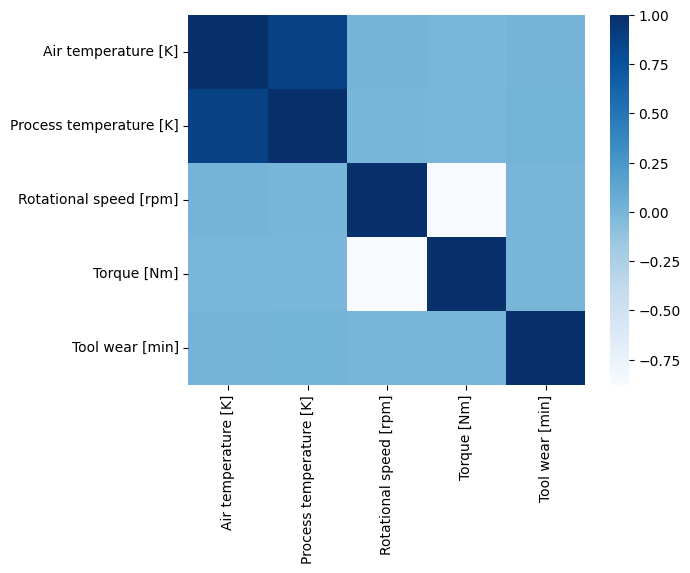

In [61]:
numeric_data = X_train.select_dtypes(include=['int64', 'float64'])

# Display the heatmap of correlations
sns.heatmap(numeric_data.corr(), cmap="Blues")
plt.show()

In [62]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [63]:
y_train.value_counts()

Failure Type
1    7245
0      86
3      64
2      57
5      35
4      13
Name: count, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [65]:
y_train_resampled.value_counts()

Failure Type
1    7245
0    7245
2    7245
4    7245
3    7245
5    7245
Name: count, dtype: int64

In [66]:
np.unique(y_train_resampled,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([7245, 7245, 7245, 7245, 7245, 7245], dtype=int64))

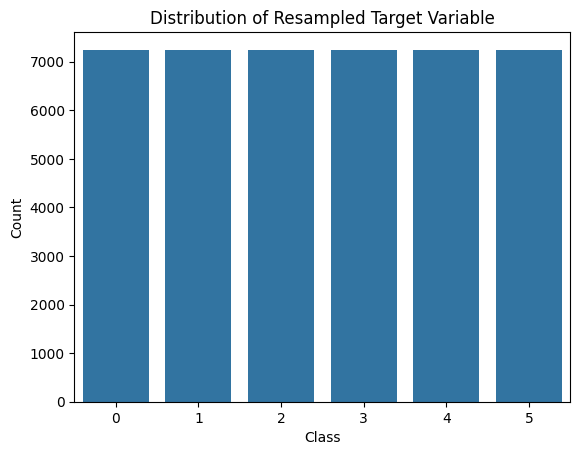

In [67]:

sns.countplot(x=y_train_resampled)
plt.title('Distribution of Resampled Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def evaluate_model(model_name, X_train, y_train, X_test, y_test):
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the model based on the model name provided
    if model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000)
    elif model_name == 'SVM (RBF Kernel)':
        model = SVC(kernel='rbf', C=1.0, gamma='scale')
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100)
    elif model_name == 'K-Nearest Neighbors':
        model = KNeighborsClassifier()
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    else:
        print(f"Model '{model_name}' is not supported.")
        return
    
    # Train the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print evaluation report
    print(f'\nModel: {model_name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))



In [69]:
evaluate_model('Logistic Regression', X_train_resampled,y_train_resampled, X_test, y_test)


Model: Logistic Regression
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.85      0.46        26
           1       1.00      0.81      0.89      2407
           2       0.39      0.95      0.56        21
           3       0.54      0.90      0.67        31
           4       0.00      0.20      0.01         5
           5       0.08      0.90      0.15        10

    accuracy                           0.81      2500
   macro avg       0.39      0.77      0.46      2500
weighted avg       0.97      0.81      0.88      2500



In [70]:
evaluate_model('Random Forest', X_train_resampled,y_train_resampled, X_test, y_test)


Model: Random Forest
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.99      0.98      0.98      2407
           2       0.70      0.76      0.73        21
           3       0.78      0.81      0.79        31
           4       0.00      0.00      0.00         5
           5       0.10      0.20      0.13        10

    accuracy                           0.97      2500
   macro avg       0.55      0.59      0.57      2500
weighted avg       0.98      0.97      0.97      2500

